In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset = "EGG"
model = "DLinear"
steps_per_individual = 4881

feature_names = ["Trend", "Seasonality", "MSE", "MASE"]
num_features = len(feature_names)

path = "data/" + dataset + "/" + model

In [15]:
features = np.load(path + "/features.npy")
mask = np.load(path + "/mask.npy")
num_individuals = features.shape[0] // steps_per_individual

In [16]:
l = []
b = []
indiv = 0
korv = None
for i in range(features.shape[0]):
    if mask[i, indiv] != korv:
        korv = mask[i, indiv]
        l.append(1)
        b.append(korv)
    else:
        l[-1] += 1
print(l)
print(b)

[9762, 19524, 4881, 4881, 9762]
[True, False, True, False, True]


In [17]:
best_per_individual = []
feature_to_sort = 2
for indiv in range(num_individuals):
    best_diff = 0
    best_i = -1
    for i in range(indiv*steps_per_individual, (indiv+1)*steps_per_individual):
        current_mask = np.array(mask[i, :], dtype=bool)
        current_features = features[i, ...]
        ins = current_features[current_mask]
        outs = current_features[np.logical_not(current_mask)]
        
        diff = abs(ins[:, feature_to_sort].mean() - outs[:, feature_to_sort].mean()) / ins[:, feature_to_sort].std()
        if diff > best_diff:
            best_i = i
            best_diff = diff
    best_per_individual.append(best_i)


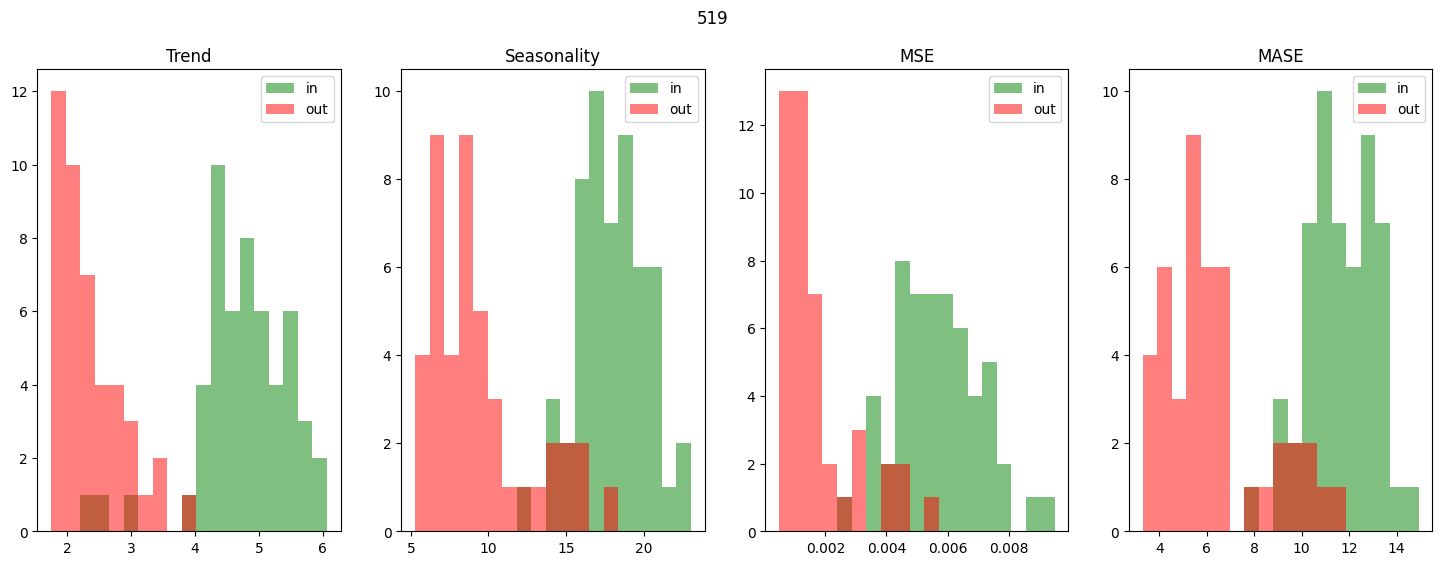

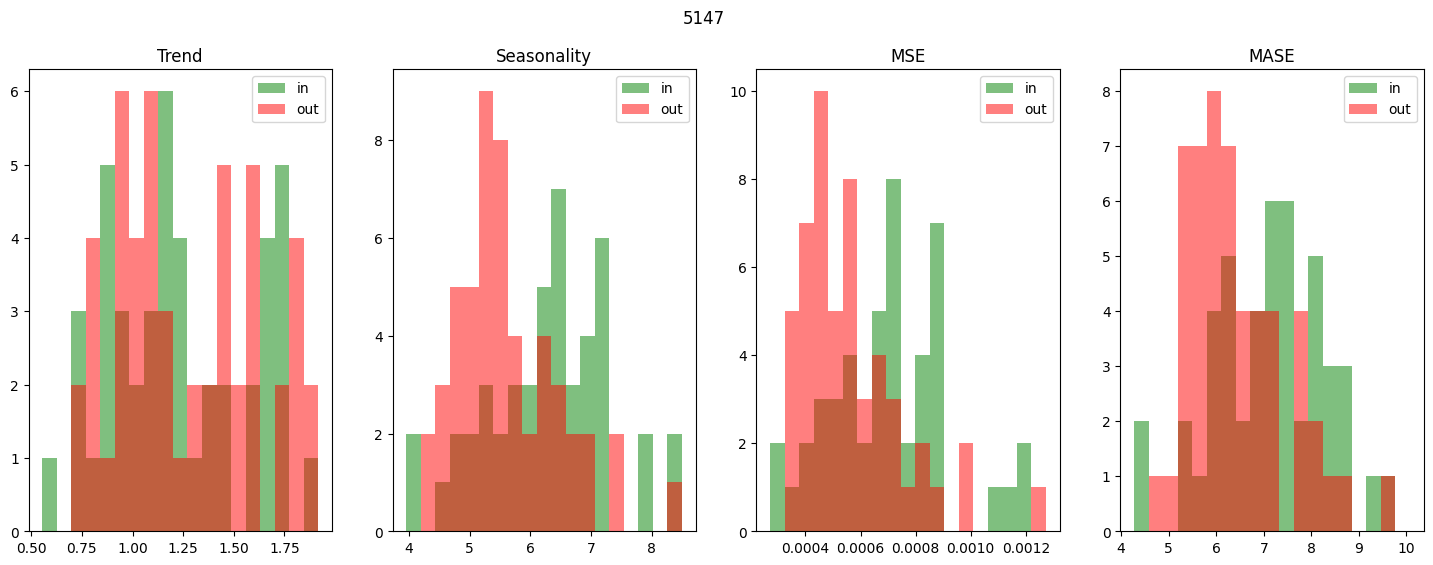

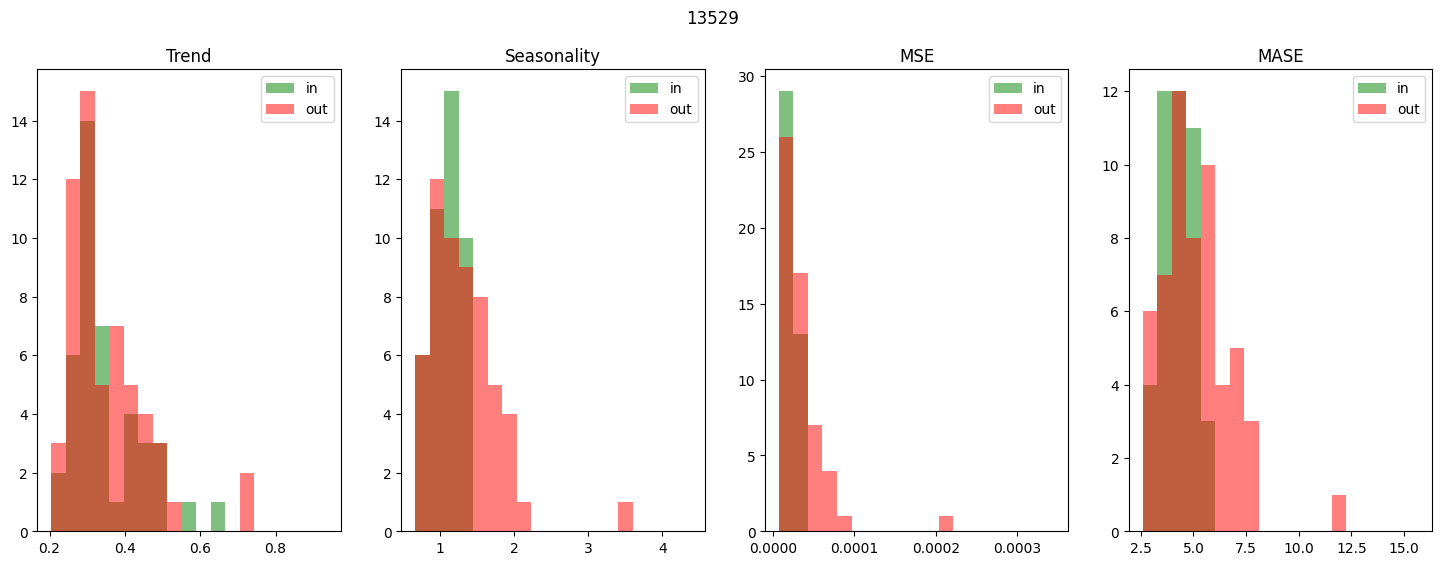

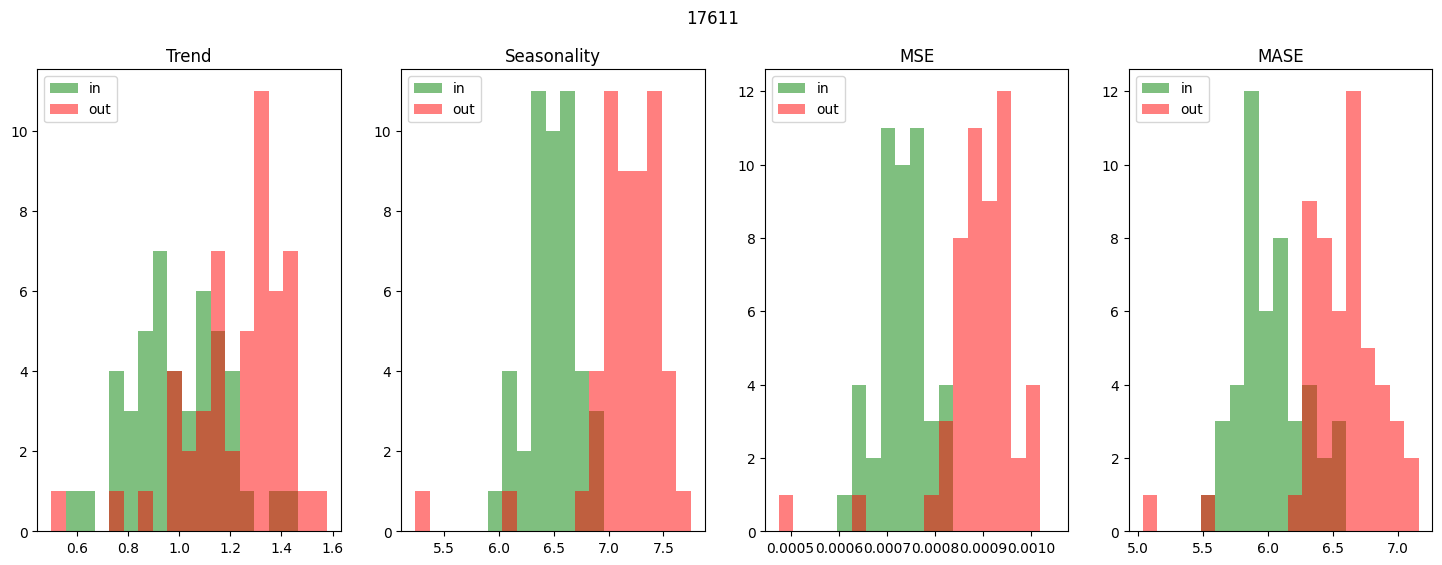

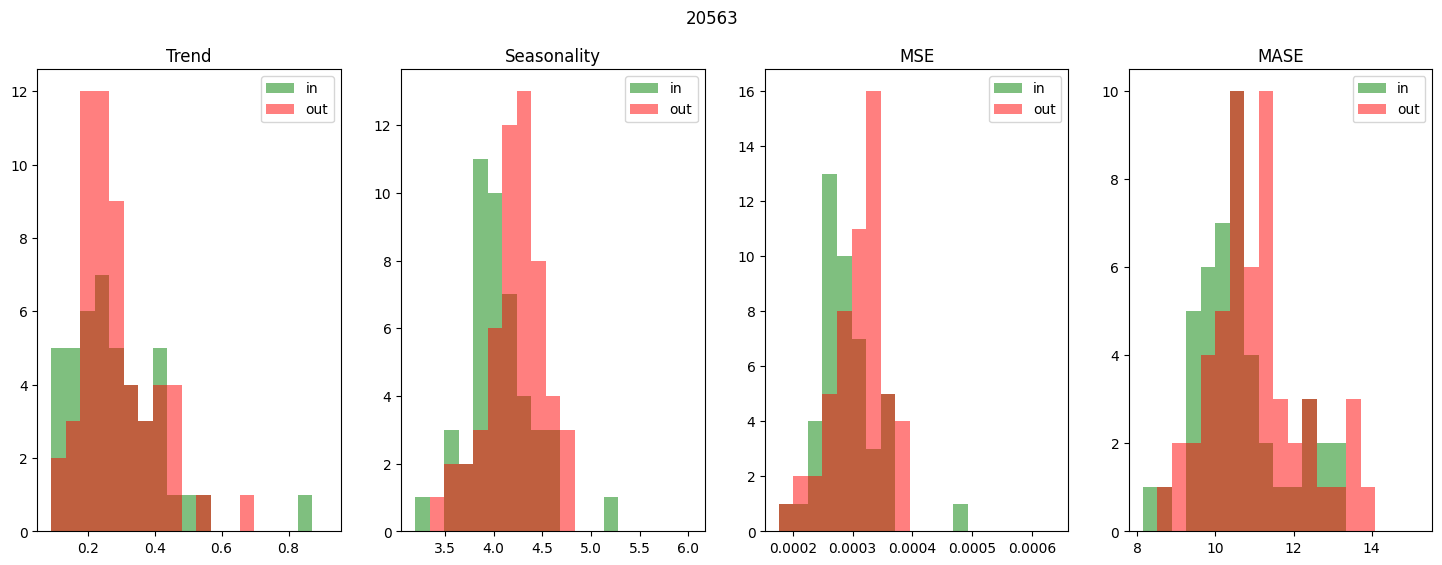

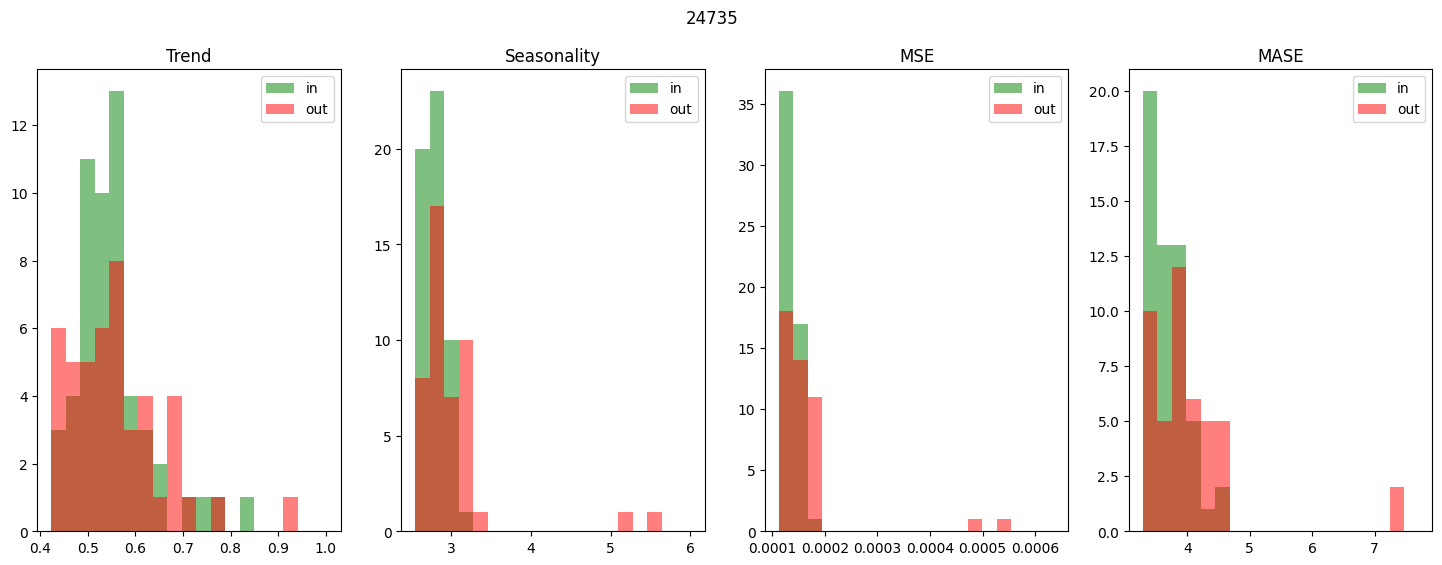

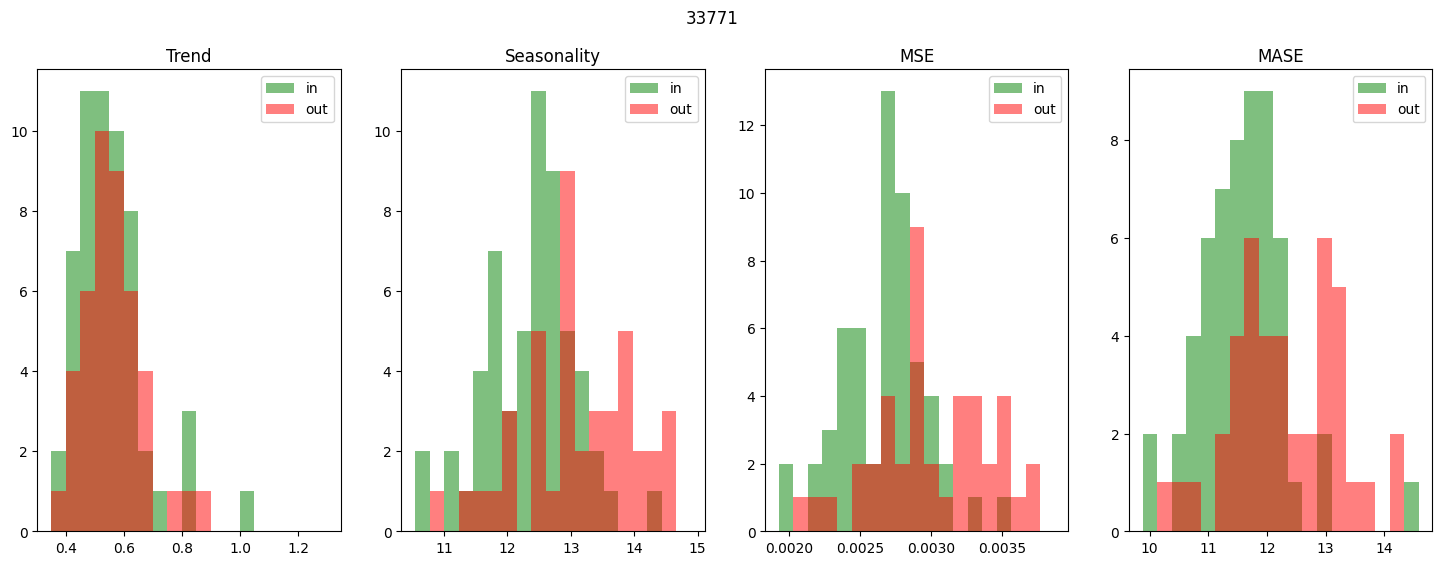

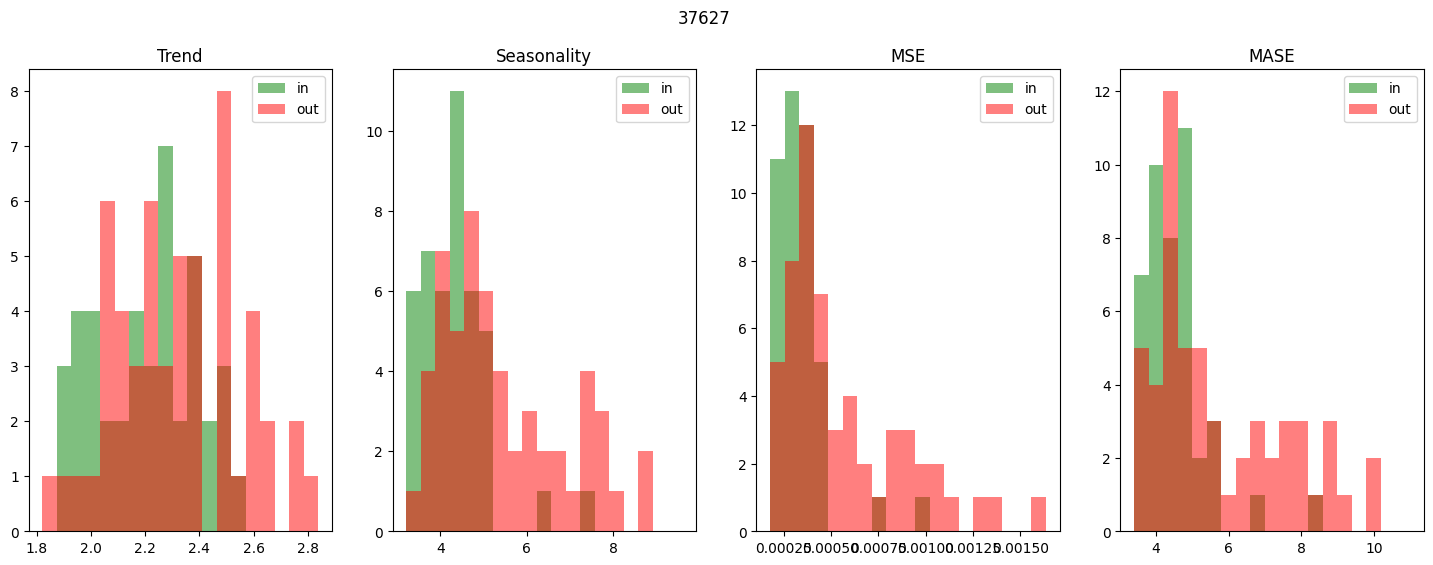

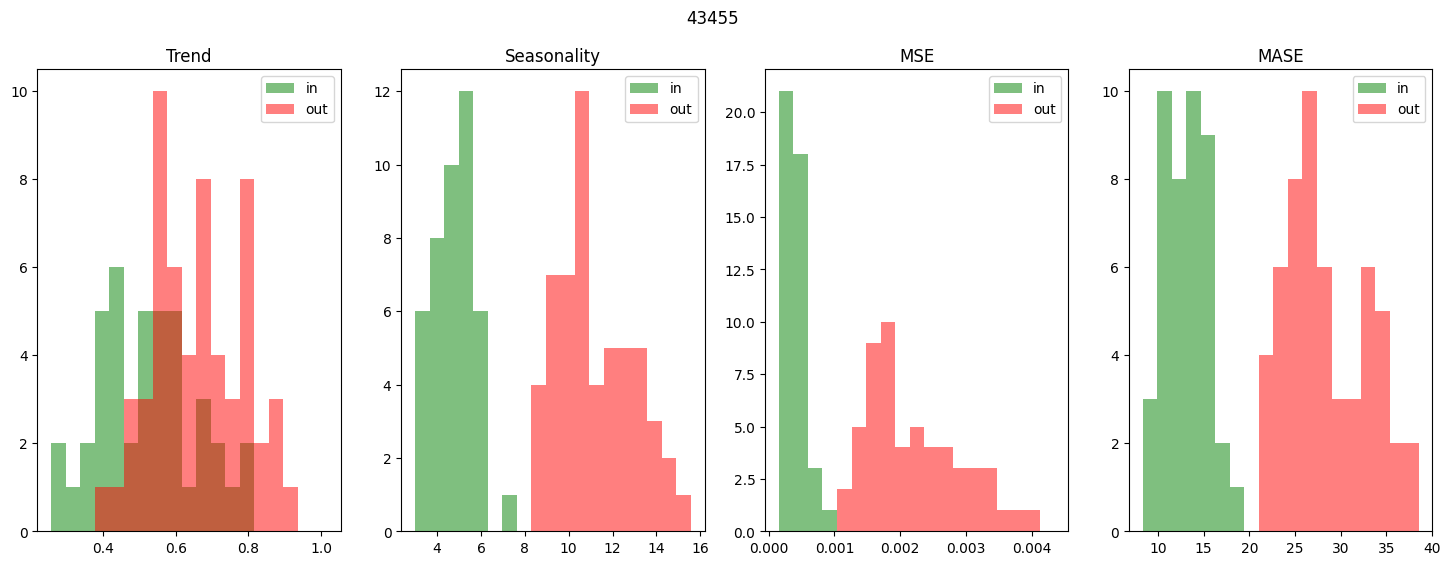

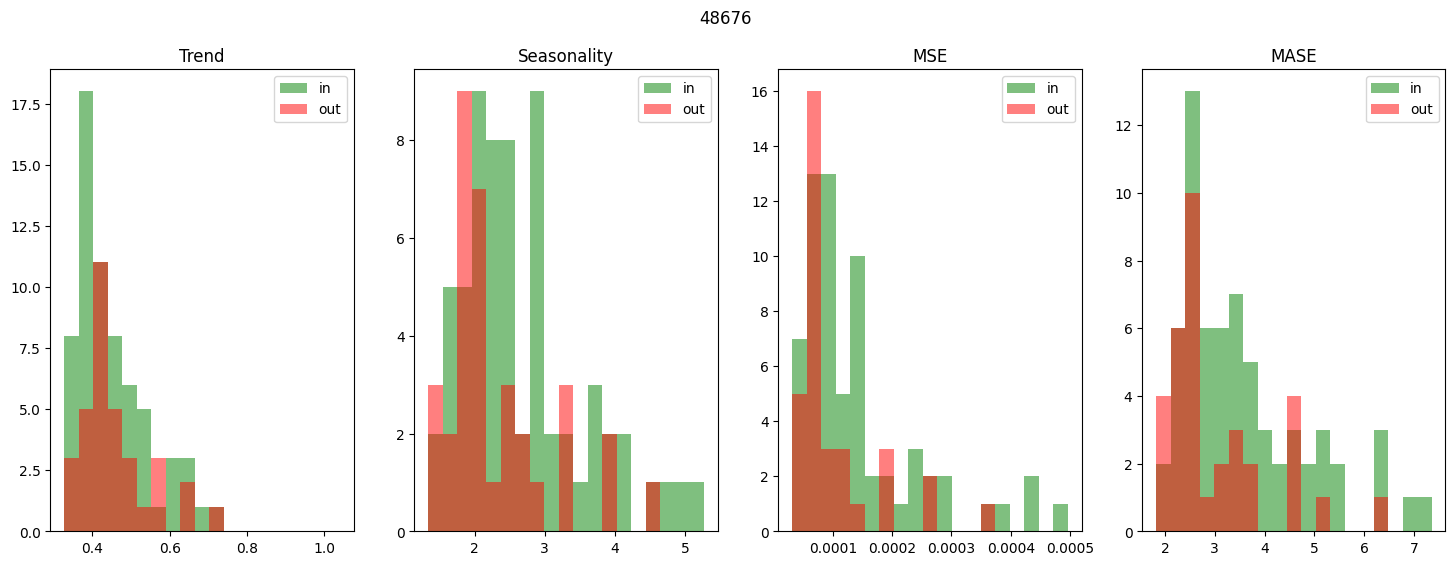

In [18]:
num_plots = 10
for i in best_per_individual:
    fig, axs = plt.subplots(1, num_features)
    fig.set_size_inches(18, 6)
    fig.suptitle(str(i))
    for f in range(num_features):
        ax = axs[f]
        ax.set_title(feature_names[f])
        current_mask = np.array(mask[i, :], dtype=bool)
        current_features = features[i, :, f]
        ins = current_features[current_mask]
        outs = current_features[np.logical_not(current_mask)]
        bins = np.arange(min(current_features), max(current_features), (max(current_features)-min(current_features))/20)
        ax.hist(ins, color="green", alpha=0.5, bins=bins, label="in")
        ax.hist(outs, color="red", alpha=0.5, bins=bins, label="out")
        ax.legend()
        
    plt.show()
